<a href="https://colab.research.google.com/github/LucasCabra7/CDPeers-Group-Case-Digital/blob/main/CDPeers_Group_%7C_Case_Digital_Lucas_Cabral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas e Uploads:

In [64]:
# Importando bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [79]:
from google.colab import files
uploaded = files.upload()

Saving Case_Infomaz_Base_de_Dados.xlsx to Case_Infomaz_Base_de_Dados.xlsx


In [66]:
dados = pd.read_excel('Case_Infomaz_Base_de_Dados.xlsx')

# Tratamento dos dados


*   **Dados de Cadastro de Produtos**


In [105]:
# Upload dos dados de Casdastro de Produtos
dados_cadastro_prod = pd.read_excel('Case_Infomaz_Base_de_Dados.xlsx', sheet_name= 'Cadastro Produtos')
dados_cadastro_prod

,ID PRODUTO,ID ESTOQUE,NOME PRODUTO,CATEGORIA
0,1001,5001,Notebook EliteBook,Eletrônicos
1,1002,5002,Smartphone Galaxy S23,Eletrônicos
2,1003,5003,Mesa de Escritório,Móveis
3,1004,5004,Cadeira Ergonômica,Móveis
4,1005,5005,"Monitor 24"" Full HD",Eletrônicos
5,1006,5006,Teclado Sem Fio,Eletrônicos
6,1007,5007,Mouse Gamer,Eletrônicos
7,1008,5008,Impressora Multifuncional,Eletrônicos
8,1009,5009,HD Externo 1TB,Eletrônicos
9,1010,5010,Webcam Full HD,Eletrônicos


In [80]:
# Verificar informações qualitativa e quantitativas dos dados:
dados_cadastro_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 29 to 36
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID PRODUTO    40 non-null     int64 
 1   ID ESTOQUE    40 non-null     int64 
 2   NOME PRODUTO  40 non-null     object
 3   CATEGORIA     40 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


In [81]:
# Verificar se há dados duplicados ou 'Null':
dados_cadastro_prod.isnull().any()
dados_cadastro_prod.duplicated().any()

np.False_

*Note que não há valores duplicados ou Nulos (Null) nos dados, então podemos seguir com a análise dos dados.*

In [82]:
# Distribuição de produtos por categoria:
dados_cadastro_prod['CATEGORIA'].value_counts()

,count
CATEGORIA,
Eletrônicos,12
Acessórios,6
Eletrodomésticos,4
Ferramentas,4
Papelaria,4
Móveis,4
Decoração,3
Livros,3


In [83]:
# Ordernar os dados por 'Categorias':
dados_cadastro_prod = dados_cadastro_prod.sort_values(by='CATEGORIA')

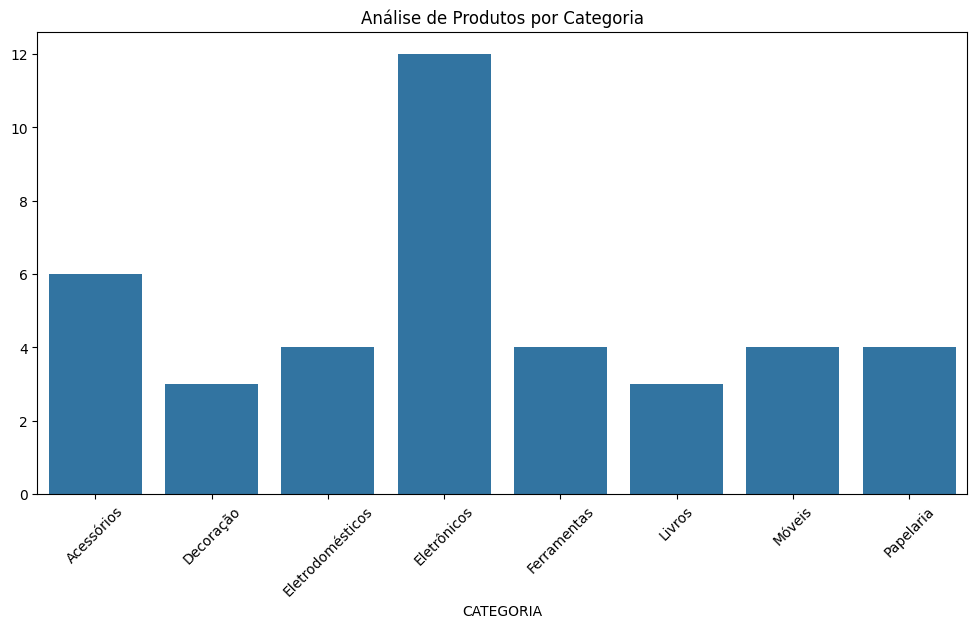

In [84]:
# Criação um gráfico de barras que represente a quantidade de produtos com base na categoria.
plt.figure(figsize=(12, 6))
sns.countplot(x='CATEGORIA', data=dados_cadastro_prod)
plt.title('Análise de Produtos por Categoria')
plt.xlabel('CATEGORIA')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.show()


*   **Dados de Transações de vendas**


In [287]:
# Upload dos dados de Transações de vendas:
dados_vendas = pd.read_excel('Case_Infomaz_Base_de_Dados.xlsx', sheet_name= 'Transações Vendas')
dados_vendas

,ID NOTA,DATA NOTA,VALOR NOTA,VALOR ITEM,QTD ITEM,ID PRODUTO,ID CLIENTE
0,3001,44990,4299.9,4299.9,1,1001,2015
1,3002,44997,5798.9,3899.0,1,1002,2003
2,3002,44997,5798.9,1899.0,1,1013,2003
3,3003,45003,1028.8,129.9,1,1006,2028
4,3003,45003,1028.8,899.5,1,1003,2028
...,...,...,...,...,...,...,...
231,3148,45520,1768.8,849.9,1,1005,2029
232,3148,45520,1768.8,19.9,1,1036,2029
233,3149,45524,1049.7,349.9,3,1009,2018
234,3150,45527,1129.8,129.9,1,1006,2033




*   **Dados de Cadastro de Estoque**



In [104]:
dados_cadastro_estoque = pd.read_excel('Case_Infomaz_Base_de_Dados.xlsx', sheet_name= 'Cadastro de Estoque')
dados_cadastro_estoque

,ID ESTOQUE,VALOR ESTOQUE,QTD ESTOQUE,DATA ESTOQUE,ID FORNECEDOR
0,5001,171996,50,44986,F100
1,5002,124768,40,44972,F105
2,5003,35980,50,44936,F110
3,5004,51960,50,45021,F115
4,5005,33996,50,45005,F120
5,5006,10392,100,45058,F125
6,5007,15992,100,45085,F130
7,5008,27960,50,45038,F135
8,5009,13996,50,45076,F140
9,5010,9996,50,44999,F145


# Questão 1: Calcule o valor total de venda dos produtos por categoria.

In [92]:
# Distribuição de 'QTD ITEM' por 'ID PRODUTO':
qtd_total_por_produto = dados_vendas.groupby('ID PRODUTO')['QTD ITEM'].sum().reset_index()
qtd_total_por_produto

,ID PRODUTO,QTD ITEM
0,1001,2
1,1002,3
2,1003,58
3,1004,49
4,1005,25
5,1006,14
6,1009,75
7,1011,1
8,1012,11
9,1013,1


In [89]:
# Criação de uma nova coluna com o valor total de cada linha:
dados_vendas['VALOR TOTAL'] = dados_vendas['QTD ITEM'] * dados_vendas['VALOR ITEM']

# Agrupar os dados por 'ID PRODUTO' e somar o 'VALOR TOTAL':
total_por_produto = dados_vendas.groupby('ID PRODUTO')['VALOR TOTAL'].sum().reset_index()

# Ordenando os dados do maior para o menor:
total_por_produto = total_por_produto.sort_values(by='VALOR TOTAL', ascending=False)

total_por_produto

,ID PRODUTO,VALOR TOTAL
3,1004,63651.0
2,1003,52171.0
13,1039,26397.8
6,1009,26242.5
4,1005,21247.5
10,1023,14717.7
11,1033,12998.7
1,1002,11697.0
8,1012,9889.0
0,1001,8599.8


In [93]:
# Agrupar o valor total de vendas por categoria:
total_por_categoria = total_por_produto.merge(dados_cadastro_prod[['ID PRODUTO', 'CATEGORIA']], on='ID PRODUTO')
total_por_categoria = total_por_categoria.groupby('CATEGORIA')['VALOR TOTAL'].sum().reset_index()

# Ordenar os dados do maior para o menor:
total_por_categoria = total_por_categoria.sort_values(by='VALOR TOTAL', ascending=False)

total_por_categoria

,CATEGORIA,VALOR TOTAL
3,Móveis,127610.0
0,Eletrônicos,96403.1
1,Ferramentas,14717.7
2,Livros,12998.7
4,Papelaria,477.6


<ipython-input-97-3b5320f5962c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_por_categoria, x='CATEGORIA', y='VALOR TOTAL', palette='viridis')


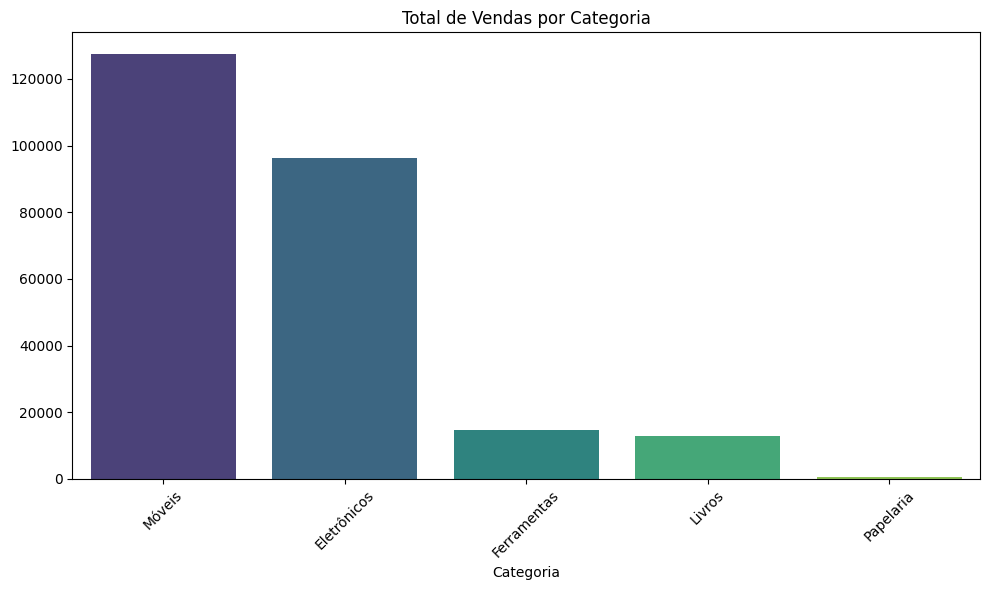

In [97]:
# Criação um gráfico de barras que represente o valor total dos produtos com base na categoria.
plt.figure(figsize=(10, 6))
sns.barplot(data=total_por_categoria, x='CATEGORIA', y='VALOR TOTAL', palette='viridis')

plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Com base nos dados apresentados, observa-se que a categoria com maior volume de vendas é a de móveis, enquanto a categoria com menor desempenho em vendas é a de papelaria.*

# Questão 2: Calcule a margem  dos produtos subtraindo o valor unitario pelo valor de venda.

In [274]:
# Agrupando/mapeando o 'ID PRODUTO' e 'ID ESTOQUE':
mapeamento_produto_estoque = dados_cadastro_prod[['ID PRODUTO', 'ID ESTOQUE']].drop_duplicates()

In [275]:
# Calcular valor unitário de vendas:
dados_vendas['VALOR UNITÁRIO VENDA'] = dados_vendas['VALOR ITEM'] / dados_vendas['QTD ITEM']

In [276]:
# Agrupar para obter o valor médio de vendas por produto:
valor_medio_venda = dados_vendas.groupby('ID PRODUTO')['VALOR UNITÁRIO VENDA'].mean().reset_index()

In [277]:
# Agrupando com mapeamento de estoque:
dados_margem = valor_medio_venda.merge(
    mapeamento_produto_estoque,
    on='ID PRODUTO',
    how='left'
)

In [278]:
# Agrupando com valores de estoque:
dados_margem = dados_margem.merge(
    dados_cadastro_estoque[['ID ESTOQUE', 'VALOR ESTOQUE']],
    on='ID ESTOQUE',
    how='left'
)

In [279]:
# Converter VALOR ESTOQUE:
dados_margem['VALOR UNITÁRIO ESTOQUE'] = dados_margem['VALOR ESTOQUE'] / 100

In [280]:
# Calcular Margem:
dados_margem['MARGEM'] = dados_margem['VALOR UNITÁRIO VENDA'] - dados_margem['VALOR UNITÁRIO ESTOQUE']

# Calular Margem percentual:
dados_margem['MARGEM PERCENTUAL'] = (dados_margem['MARGEM'] / dados_margem['VALOR UNITÁRIO ESTOQUE']) * 100

In [281]:
# Ordenarção descrente:
dados_margem = dados_margem.sort_values('MARGEM', ascending=False)

In [282]:
# Agrupar com nome dos produtos:
dados_margem = dados_margem.merge(
    dados_cadastro_prod[['ID PRODUTO', 'NOME PRODUTO', 'CATEGORIA']],
    on='ID PRODUTO',
    how='left'
)

In [283]:
# Selecionar colunas relevante:
resultado_final = dados_margem[[
    'ID PRODUTO',
    'NOME PRODUTO',
    'CATEGORIA',
    'VALOR UNITÁRIO VENDA',
    'VALOR UNITÁRIO ESTOQUE',
    'MARGEM',
    'MARGEM PERCENTUAL'
]]

In [284]:
# Formatando os valores para duas casas decimais:
resultado_final['VALOR UNITÁRIO VENDA'] = resultado_final['VALOR UNITÁRIO VENDA'].round(2)
resultado_final['VALOR UNITÁRIO ESTOQUE'] = resultado_final['VALOR UNITÁRIO ESTOQUE'].round(2)
resultado_final['MARGEM'] = resultado_final['MARGEM'].round(2)
resultado_final['MARGEM PERCENTUAL'] = resultado_final['MARGEM PERCENTUAL'].round(1)

<ipython-input-284-dc04f0faeba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_final['VALOR UNITÁRIO VENDA'] = resultado_final['VALOR UNITÁRIO VENDA'].round(2)
<ipython-input-284-dc04f0faeba5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_final['VALOR UNITÁRIO ESTOQUE'] = resultado_final['VALOR UNITÁRIO ESTOQUE'].round(2)
<ipython-input-284-dc04f0faeba5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [285]:
resultado_final

,ID PRODUTO,NOME PRODUTO,CATEGORIA,VALOR UNITÁRIO VENDA,VALOR UNITÁRIO ESTOQUE,MARGEM,MARGEM PERCENTUAL
0,1002,Smartphone Galaxy S23,Eletrônicos,3899.00,1247.68,2651.32,212.5
1,1001,Notebook EliteBook,Eletrônicos,4299.90,1719.96,2579.94,150.0
2,1013,Armário de Aço,Móveis,1899.00,759.60,1139.40,150.0
3,1033,Livro: Python para Iniciantes,Livros,999.90,39.96,959.94,2402.3
4,1039,"Tablet 10""",Eletrônicos,1199.90,479.96,719.94,150.0
5,1012,Estante em Madeira,Móveis,899.00,239.60,659.40,275.2
6,1004,Cadeira Ergonômica,Móveis,1064.46,519.60,544.86,104.9
7,1005,"Monitor 24"" Full HD",Eletrônicos,849.90,339.96,509.94,150.0
8,1023,Serra Elétrica,Ferramentas,639.90,171.96,467.94,272.1
9,1003,Mesa de Escritório,Móveis,716.27,359.80,356.47,99.1


# Questão 3: Calcule um ranking de clientes por quantidade de produtos comprados.

In [289]:
# Verificar quantidade de produtos comprados por ID CLIENTES:
qtd_produtos_por_cliente = dados_vendas.groupby('ID CLIENTE')['QTD ITEM'].sum().reset_index()
qtd_produtos_por_cliente

,ID CLIENTE,QTD ITEM
0,1023,1
1,2001,8
2,2002,7
3,2003,6
4,2004,8
5,2005,10
6,2006,9
7,2007,12
8,2008,10
9,2009,8


In [292]:
# Ordenação descrente do Ranking dos clientes:
qtd_produtos_por_cliente = qtd_produtos_por_cliente.sort_values(by='QTD ITEM', ascending=False)

In [291]:
qtd_produtos_por_cliente

,ID CLIENTE,QTD ITEM
30,2030,13
17,2017,13
7,2007,12
20,2020,12
11,2011,11
18,2018,11
8,2008,10
5,2005,10
29,2029,10
31,2031,10


# Questão 4: Calcule um ranking de fornecedores por quantidade de estoque disponivel.

In [297]:
# Ranking de forncedores por quantidade de estoque:
qtd_estoque_por_fornecedor = dados_cadastro_estoque.groupby('ID FORNECEDOR')['QTD ESTOQUE'].sum().reset_index()
qtd_estoque_por_fornecedor

,ID FORNECEDOR,QTD ESTOQUE
0,F100,150
1,F105,140
2,F110,200
3,F115,200
4,F120,250
5,F125,250
6,F130,250
7,F135,200
8,F140,200
9,F145,150


In [298]:
# Ordenação descrecente do Ranking:
qtd_estoque_por_fornecedor = qtd_estoque_por_fornecedor.sort_values(by='QTD ESTOQUE', ascending=False)

In [299]:
qtd_estoque_por_fornecedor

,ID FORNECEDOR,QTD ESTOQUE
6,F130,250
5,F125,250
4,F120,250
7,F135,200
8,F140,200
2,F110,200
3,F115,200
9,F145,150
0,F100,150
10,F150,150


# Questão 5: Calcule um ranking de produtos por quantidade de venda.


In [333]:
# Ranking de produtos por quantidade de vendas com ID PRODUTO e NOME PRODUTO:
qtd_vendas_por_produto = dados_vendas.groupby('ID PRODUTO')['QTD ITEM'].sum().reset_index()
qtd_total_por_produto

,ID PRODUTO,QTD ITEM
0,1001,2
1,1002,3
2,1003,58
3,1004,49
4,1005,25
5,1006,14
6,1009,75
7,1011,1
8,1012,11
9,1013,1


In [334]:
# Converter os tipos para os dados ficarem consistentes:
dados_vendas['ID PRODUTO'] = dados_vendas['ID PRODUTO'].astype(int)
dados_cadastro_prod['ID PRODUTO'] = dados_cadastro_prod['ID PRODUTO'].astype(int)

In [335]:
# Trazer os nomes dos produtos para seus respectivos ID PRODUTOS:
qtd_vendas_por_produto = qtd_vendas_por_produto.merge(
    dados_cadastro_prod[['ID PRODUTO', 'NOME PRODUTO']],
    on='ID PRODUTO',
    how='left'
)

In [336]:
# Ordenação descrente dos produtos:
qtd_vendas_por_produto = qtd_vendas_por_produto.sort_values('QTD ITEM', ascending=False)
qtd_vendas_por_produto

,ID PRODUTO,QTD ITEM,NOME PRODUTO
6,1009,75,HD Externo 1TB
2,1003,58,Mesa de Escritório
3,1004,49,Cadeira Ergonômica
4,1005,25,"Monitor 24"" Full HD"
12,1036,24,Grampeador
10,1023,23,Serra Elétrica
13,1039,22,"Tablet 10"""
5,1006,14,Teclado Sem Fio
11,1033,13,Livro: Python para Iniciantes
8,1012,11,Estante em Madeira


# Questão 6: Calcule um ranking de produtos por valor de venda.

*Note que já realizamos este processo, na questão 1:*

In [340]:
# Calcular ranking de produtos por valor de venda:
total_por_produto = total_por_produto.sort_values(by='VALOR TOTAL', ascending=False)

In [359]:
# Trazer os nomes dos produtos para seus respectivos ID PRODUTOS:
total_por_produto = total_por_produto.merge(
    dados_cadastro_prod[['ID PRODUTO', 'NOME PRODUTO']],
    on='ID PRODUTO',
    how='left'
)

total_por_produto

,ID PRODUTO,NOME PRODUTO_x,NOME PRODUTO_y,NOME PRODUTO
0,1004,Cadeira Ergonômica,Cadeira Ergonômica,Cadeira Ergonômica
1,1003,Mesa de Escritório,Mesa de Escritório,Mesa de Escritório
2,1039,"Tablet 10""","Tablet 10""","Tablet 10"""
3,1009,HD Externo 1TB,HD Externo 1TB,HD Externo 1TB
4,1005,"Monitor 24"" Full HD","Monitor 24"" Full HD","Monitor 24"" Full HD"
5,1023,Serra Elétrica,Serra Elétrica,Serra Elétrica
6,1033,Livro: Python para Iniciantes,Livro: Python para Iniciantes,Livro: Python para Iniciantes
7,1002,Smartphone Galaxy S23,Smartphone Galaxy S23,Smartphone Galaxy S23
8,1012,Estante em Madeira,Estante em Madeira,Estante em Madeira
9,1001,Notebook EliteBook,Notebook EliteBook,Notebook EliteBook


# Questão 7: Calcule a média de valor de venda por categoria de produto.

*Note que, já realizamos esta tarefa na questão 1. Basta adpatar:*

In [342]:
# Valor de vendas por CATEGORIA:
total_por_categoria

,CATEGORIA,VALOR TOTAL
3,Móveis,127610.0
0,Eletrônicos,96403.1
1,Ferramentas,14717.7
2,Livros,12998.7
4,Papelaria,477.6


In [352]:
# Media de vendas por cada categoria:
categorias = {
    'CATEGORIA': ['Móveis', 'Eletrônicos', 'Ferramentas', 'Livros', 'Papelaria'],
    'VALOR TOTAL': [127610.0, 96403.1, 14717.7, 12998.7, 477.6]
}
total_por_categoria = pd.DataFrame(categorias)

# Valores dos dados de Cadastro de Produtos:
divisores = {
    'Móveis': 4,
    'Eletrônicos': 12,
    'Ferramentas': 4,
    'Livros': 3,
    'Papelaria': 4
}

# Calcular a média para cada categoria:
total_por_categoria['MÉDIA'] = total_por_categoria.apply(
    lambda row: row['VALOR TOTAL'] / divisores[row['CATEGORIA']],
    axis=1
)

# Arredondar para 2 casas decimais:
total_por_categoria['MÉDIA'] = total_por_categoria['MÉDIA'].round(2)

# Ordenar pelo valor total:
total_por_categoria = total_por_categoria.sort_values('VALOR TOTAL', ascending=False)
total_por_categoria[['CATEGORIA', 'VALOR TOTAL', 'MÉDIA']]

,CATEGORIA,VALOR TOTAL,MÉDIA
0,Móveis,127610.0,31902.50
1,Eletrônicos,96403.1,8033.59
2,Ferramentas,14717.7,3679.42
3,Livros,12998.7,4332.90
4,Papelaria,477.6,119.40


# Questão 8: Calcule um ranking de margem de lucro por categoria.

*Note que, ja realizamos essa atividade na questão 2 (margem percentual):*

In [353]:
resultado_final

,ID PRODUTO,NOME PRODUTO,CATEGORIA,VALOR UNITÁRIO VENDA,VALOR UNITÁRIO ESTOQUE,MARGEM,MARGEM PERCENTUAL
0,1002,Smartphone Galaxy S23,Eletrônicos,3899.00,1247.68,2651.32,212.5
1,1001,Notebook EliteBook,Eletrônicos,4299.90,1719.96,2579.94,150.0
2,1013,Armário de Aço,Móveis,1899.00,759.60,1139.40,150.0
3,1033,Livro: Python para Iniciantes,Livros,999.90,39.96,959.94,2402.3
4,1039,"Tablet 10""",Eletrônicos,1199.90,479.96,719.94,150.0
5,1012,Estante em Madeira,Móveis,899.00,239.60,659.40,275.2
6,1004,Cadeira Ergonômica,Móveis,1064.46,519.60,544.86,104.9
7,1005,"Monitor 24"" Full HD",Eletrônicos,849.90,339.96,509.94,150.0
8,1023,Serra Elétrica,Ferramentas,639.90,171.96,467.94,272.1
9,1003,Mesa de Escritório,Móveis,716.27,359.80,356.47,99.1


# Questão 9: Liste produtos comprados por clientes

*Note que, ja realizamos este problema na questão 1:*

In [364]:
# Item da questão anterior:
total_por_produto

,ID PRODUTO,NOME PRODUTO_x,NOME PRODUTO_y,NOME PRODUTO
0,1004,Cadeira Ergonômica,Cadeira Ergonômica,Cadeira Ergonômica
1,1003,Mesa de Escritório,Mesa de Escritório,Mesa de Escritório
2,1039,"Tablet 10""","Tablet 10""","Tablet 10"""
3,1009,HD Externo 1TB,HD Externo 1TB,HD Externo 1TB
4,1005,"Monitor 24"" Full HD","Monitor 24"" Full HD","Monitor 24"" Full HD"
5,1023,Serra Elétrica,Serra Elétrica,Serra Elétrica
6,1033,Livro: Python para Iniciantes,Livro: Python para Iniciantes,Livro: Python para Iniciantes
7,1002,Smartphone Galaxy S23,Smartphone Galaxy S23,Smartphone Galaxy S23
8,1012,Estante em Madeira,Estante em Madeira,Estante em Madeira
9,1001,Notebook EliteBook,Notebook EliteBook,Notebook EliteBook


In [365]:
# Listando apenas os nomes dos produtos comprados:
nome_produtos_comprados = total_por_produto['NOME PRODUTO']
nome_produtos_comprados

,NOME PRODUTO
0,Cadeira Ergonômica
1,Mesa de Escritório
2,"Tablet 10"""
3,HD Externo 1TB
4,"Monitor 24"" Full HD"
5,Serra Elétrica
6,Livro: Python para Iniciantes
7,Smartphone Galaxy S23
8,Estante em Madeira
9,Notebook EliteBook


# Questão 10: Ranking de produtos por quantidade de estoque.

In [380]:
# Ranking de ID PRODUTOS por QTD ESTOQUE:
qtd_estoque_por_produto = dados_cadastro_estoque.groupby('ID ESTOQUE')['QTD ESTOQUE'].sum().reset_index()

# Ordenação:
qtd_estoque_por_produto = qtd_estoque_por_produto.sort_values(by='QTD ESTOQUE', ascending=False)
qtd_estoque_por_produto

,ID ESTOQUE,QTD ESTOQUE
6,5007,100
5,5006,100
13,5014,100
0,5001,50
4,5005,50
3,5004,50
7,5008,50
2,5003,50
24,5025,50
8,5009,50


In [381]:
# Trazer os nomes dos produtos para seus respectivos ID ESTOQUE:
qtd_estoque_por_produto = qtd_estoque_por_produto.merge(
    dados_cadastro_prod[['ID ESTOQUE', 'NOME PRODUTO']],
    on='ID ESTOQUE',
    how='left'
)
qtd_estoque_por_produto

,ID ESTOQUE,QTD ESTOQUE,NOME PRODUTO
0,5007,100,Mouse Gamer
1,5006,100,Teclado Sem Fio
2,5014,100,Luminária de Mesa
3,5001,50,Notebook EliteBook
4,5005,50,"Monitor 24"" Full HD"
5,5004,50,Cadeira Ergonômica
6,5008,50,Impressora Multifuncional
7,5003,50,Mesa de Escritório
8,5025,50,Mochila para Notebook
9,5009,50,HD Externo 1TB
